PyNE Tutorial
=============

Welcome to the PyNE tutorial! 

<center>
    <img alt="PyNE" width="50%" src="https://raw.github.com/pyne/pyne/develop/img/pyne_icon_big.png" style="max-width: 30rem;" />
</center>


# Before you begin
* Hopefully you've installed the virtual machine if necessary. 
    - If not, please go to https://pyne.io/install/vb.html to install a virtual machine.
    - If so, open it now and open Accessories -> LXTerminal, navigate to ~/opt/pyne

# Is PyNE Installed?

You can verify that PyNE is successfully installed by running the following: 


In [1]:
from pyne import data
print(data.atomic_mass('U235'))

235.04392819


# Open the tutorial

You can start the tutorial by navigating to `~/opt/pyne/tutorial` and entering

```bash
$ jupyter notebook --matplotlib=inline
```

This should open the tutorial in a web browser. We'll start with `00-intro`.

# What is PyNE?

As our tagline says, PyNE is an open-source nuclear engineering toolkit.  

* It serves as a library of composable tools for building nuclear science and engineering applications.
* It is permissively licensed under the 2-clause BSD license.
* It supports both a C++ and a Python API.
* While the name suggests a focus on Python, most of the code base is actually written in C++.
* Daily usage and interactions with PyNE primarily occur in Python.
* The current stable release of PyNE is version 0.7.7.
* PyNE was established as an organization in April 2011, but certain core parts of PyNE have existed since 2007.

# What are the goals of PyNE?

To help nuclear engineers:

* be more productive,
* have the *best* solvers,
* have a beautiful API,
* write really great code,
* and teach the next generation.

And of course, to perform neat tricks like this:

In [2]:
import numpy as np
from pyne import mesh, material 
from pyne.xs.channels import sigma_t

#### Known error: This notebook requires [yt](https://yt-project.org/) to visualize the results. Yt needs to be updated to work properly first. Updates are currently being made to yt's frontends to make this PyNE integration work.


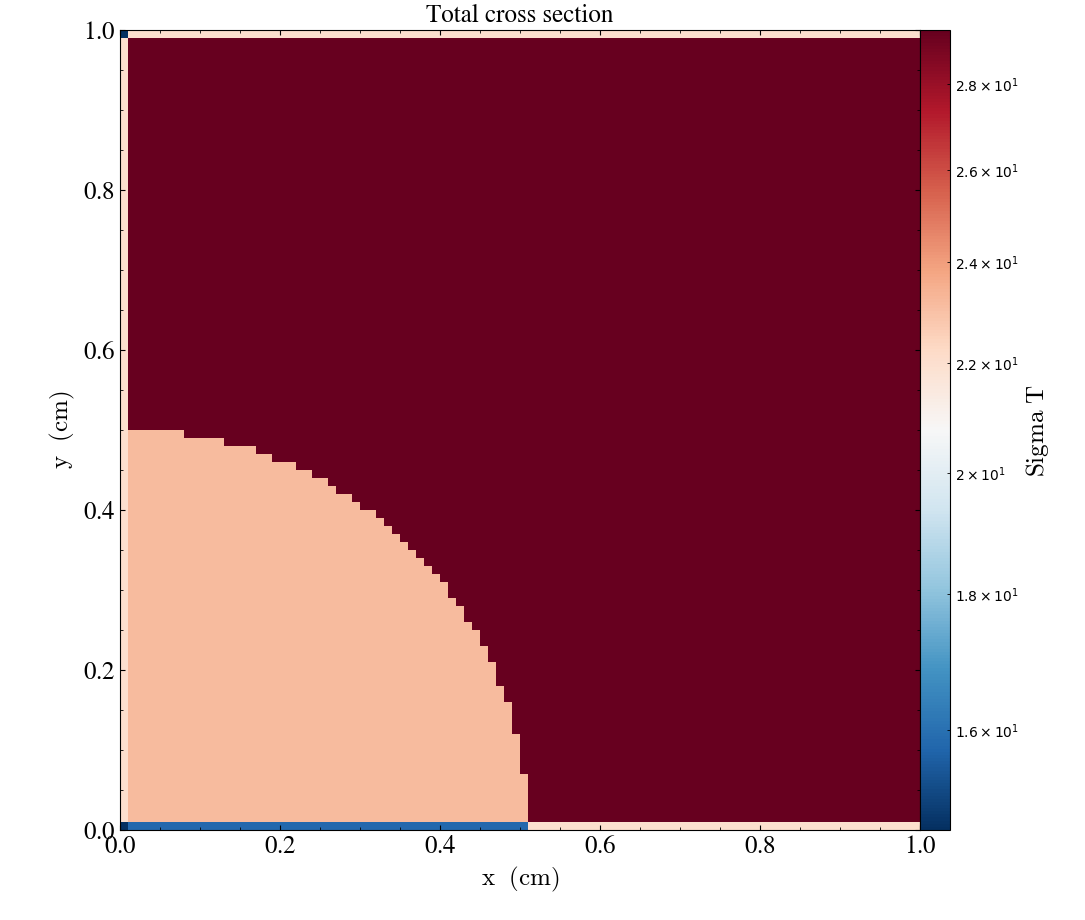

U Content of Mesh: 1732.1034518863273 grams


In [3]:
# import a few things necessary for plotting in the notebook
from yt.frontends.moab.api import PyneMoabHex8Dataset
from yt import SlicePlot
import logging

# Disable all logging outputs
logging.disable(logging.CRITICAL)

# Create reactor mesh
m = mesh.Mesh(structured_coords=[np.linspace(0.0, 1.0, 101), np.linspace(0.0, 1.0, 101), [0.0, 1.0]], structured=True)
fuel = material.from_atom_frac({'U235': 0.045, 'U238': 0.955, 'O16': 2.0}, mass=1.0, density=10.7)
cool = material.from_atom_frac({'H1': 2.0, 'O16': 1.0}, mass=1.0, density=1.0)
for i, mat, ve in m:
    coord = m.mesh.get_coords(ve)
    m.mats[i] = fuel if (coord[0]**2 + coord[1]**2) <= 0.5**2 else cool

# Create a total cross section tag on the mesh
m.sigma_t = mesh.ComputedTag(lambda mesh, i: sigma_t(mesh.mats[i], group_struct=[10.0, 1e-6], phi_g=[1.0])[0])

# Create a uranium mass tag on the mesh
m.u_mass = mesh.ComputedTag(lambda mesh, i: max(mesh.mats[i]['U':'Np'].mass, 0.0))

# Plot the total cross section
slc = SlicePlot(PyneMoabHex8Dataset(m), 'z', 'sigma_t', origin='native')
slc.annotate_title("Total cross section")
slc.set_cmap('sigma_t', "RdBu_r")
slc.display()

# Print the total mass of uranium in the reactor mesh
print("U Content of Mesh:", sum(m.u_mass[:]), "grams")


# What could you do with PyNE?

As a **user**, using PyNE for your work or research eliminates the need for you to create and upkeep similar functionality in your own software. By using PyNE, you can save time and effort in developing and maintaining those features.

As a **developer**, it is beneficial to be self-interested. Contributing to PyNE in ways that align with your work will not only support your own endeavors but also cater to the needs of other individuals. If there is a feature you require that is currently absent in PyNE, chances are that others would also benefit from its inclusion. Contributing to PyNE in this manner ensures that your future self, as well as other individuals in the future, can reap the rewards of enhanced functionality.

# What goes into PyNE?

Anything that is not export controllable, proprietary, or under HIPAA restrictions!  (If you have questions, ask.)

# Contact PyNE

**Website:** https://pyne.io

**User's Mailing List:** pyne-users@googlegroups.com

**Developer's List:** pyne-dev@googlegroups.com